In [1]:
import sys


In [2]:
#sys.path.append("/home/edixon1/GillesPy2/gillespy2")
#sys.path.append("/Users/ghilman/Documents/Coding/repo/GillesPy2")
sys.path.append("/home/dalton/environments/Gillespy2/Repository/gillespy2")

In [3]:
sys.path


['',
 '/usr/lib/python36.zip',
 '/usr/lib/python3.6',
 '/usr/lib/python3.6/lib-dynload',
 '/home/dalton/.local/lib/python3.6/site-packages',
 '/usr/lib/python3.6/site-packages',
 '/usr/local/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/lib/python3.6/dist-packages',
 '/usr/lib/python3/dist-packages/IPython/extensions',
 '/home/dalton/.ipython',
 '/home/dalton/environments/Gillespy2/Repository/gillespy2']

In [4]:
%matplotlib
%matplotlib inline
import numpy
import matplotlib.pyplot as plt

Using matplotlib backend: TkAgg


In [5]:
import gillespy2
class MichaelisMenten(gillespy2.Model):
     def __init__(self, parameter_values=None):
            #initialize Model
            gillespy2.Model.__init__(self, name="Michaelis_Menten")
            
            #parameters
            rate1 = gillespy2.Parameter(name='rate1', expression= 0.0017)
            rate2 = gillespy2.Parameter(name='rate2', expression= 0.5)
            rate3 = gillespy2.Parameter(name='rate3', expression = 0.1)
            self.add_parameter([rate1,rate2,rate3])
            
            #Species
            A = gillespy2.Species(name='A', initial_value=301)
            B = gillespy2.Species(name='B', initial_value=120)
            C = gillespy2.Species(name='C', initial_value=0)
            D = gillespy2.Species(name='D', initial_value=0)
            self.add_species([A, B, C, D])
            
            #reactions
            r1 = gillespy2.Reaction(name="r1",reactants={A:1,B:1}, products={C:1},
                   rate=rate1)
            
            r2 = gillespy2.Reaction(name="r2",reactants={C:1}, products={A:1,B:1},
                    rate=rate2)
            
            r3 = gillespy2.Reaction(name="r3",reactants={C:1}, products={B:1,D:1},
                    rate=rate3)
            self.add_reaction([r1,r2,r3])
            self.timespan(numpy.linspace(0,100,101))

Unable to use Cython optimized SSA:
Error:No module named 'pyximport'


In [6]:
from gillespy2 import SSACSolver, GillesPySolver
model = MichaelisMenten()
csolver = SSACSolver(model)

In [7]:
dresults = model.run(solver=csolver, show_labels=True)
print(dresults[0]['A'])

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100.]


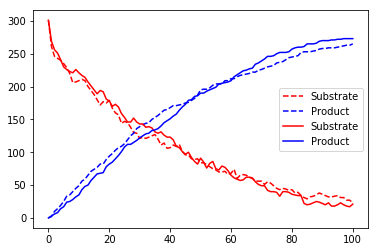

In [8]:
#import pyximport
from gillespy2 import SSASolver, SSACSolver
model = MichaelisMenten()
results = model.run(show_labels=False)
dresults = model.run(solver=csolver, show_labels=False)
plt.plot(dresults[0][:,0],dresults[0][:,1],'--r', label='Substrate')
plt.plot(dresults[0][:,0],dresults[0][:,4],'--b', label='Product')
plt.plot(results[0][:,0],results[0][:,1],'-r', label='Substrate')
plt.plot(results[0][:,0],results[0][:,4],'-b', label='Product')
plt.plot([0],[11])
plt.legend(loc='best')

In [9]:
import time
from gillespy2 import SSASolver, StochKitSolver, BasicSSASolver, SSACSolver
import numpy as np
log2_trajectories_max = 10
loops = 100
solvers = [StochKitSolver, csolver] #  SSASolver, BasicSSASolver
timing_data = np.zeros((log2_trajectories_max+1,len(solvers)+1))
for n in range(0,log2_trajectories_max+1):
    timing_data[n, 0] = 2**n
    for i in range(loops):
        for solver in range(len(solvers)):
            time_start = time.perf_counter()
            model.run(solver=solvers[solver], show_labels=False, number_of_trajectories=2**n)
            time_end = time.perf_counter()
            timing_data[n, solver+1] += (time_end - time_start)/loops
    print("{0}:\tStochKit:{1}\tSSACSolver:{2}\tRatio:{3}".format(timing_data[n,0], timing_data[n,1], timing_data[n, 2], (timing_data[n, 1]/timing_data[n, 2])))

1.0:	StochKit:0.04029058889034785	SSACSolver:0.01048560276998615	Ratio:3.842467598112252
2.0:	StochKit:0.04408894254018379	SSACSolver:0.011620507860279758	Ratio:3.7940633120592695
4.0:	StochKit:0.049746778879780316	SSACSolver:0.01348446004012658	Ratio:3.6891932440561663
8.0:	StochKit:0.059392188380516006	SSACSolver:0.016904093239718355	Ratio:3.513479696205554
16.0:	StochKit:0.0753231189604412	SSACSolver:0.022346966599943695	Ratio:3.370619391386703
32.0:	StochKit:0.1047164242297731	SSACSolver:0.03455454866038054	Ratio:3.030467139333195
64.0:	StochKit:0.1620294628701959	SSACSolver:0.05495819351024693	Ratio:2.9482312376222044
128.0:	StochKit:0.30383120842008793	SSACSolver:0.09638953439018223	Ratio:3.1521182288337175


KeyboardInterrupt: 

In [ ]:
plt.plot(timing_data[:,0],timing_data[:,1],'-r', label='StochKit')
plt.plot(timing_data[:,0],timing_data[:,2],'-b', label='Cython')
plt.plot(timing_data[:,0],timing_data[:,3],'-g', label='Numpy')
plt.plot(timing_data[:,0],timing_data[:,4],'-k', label='Python')
plt.title("SSA Simulation Time")
plt.ylabel("Seconds")
plt.xlabel("Trajectories")
plt.legend(loc='best')
plt.savefig("SSA_Comparisons3.png")